# Importing

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler, PowerTransformer
import numpy as np
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score

In [2]:
train_df = pd.read_csv('data/train.csv')
test_df = pd.read_csv('data/test.csv')
df = pd.concat([train_df, test_df])

# EDA

In [3]:
train_df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [4]:
train_df.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [5]:
train_df.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [6]:
train_df.corr()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
Age,1.000000,0.068723,0.130421,0.033133,0.123970,0.101007,-0.075026
RoomService,0.068723,1.000000,-0.015889,0.054480,0.010080,-0.019581,-0.244611
FoodCourt,0.130421,-0.015889,1.000000,-0.014228,0.221891,0.227995,0.046566
ShoppingMall,0.033133,0.054480,-0.014228,1.000000,0.013879,-0.007322,0.010141
Spa,0.123970,0.010080,0.221891,0.013879,1.000000,0.153821,-0.221131
VRDeck,0.101007,-0.019581,0.227995,-0.007322,0.153821,1.000000,-0.207075
Transported,-0.075026,-0.244611,0.046566,0.010141,-0.221131,-0.207075,1.000000


(array([8.156e+03, 2.540e+02, 6.500e+01, 1.700e+01, 9.000e+00, 9.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([    0. ,  1432.7,  2865.4,  4298.1,  5730.8,  7163.5,  8596.2,
        10028.9, 11461.6, 12894.3, 14327. ]),
 <BarContainer object of 10 artists>)

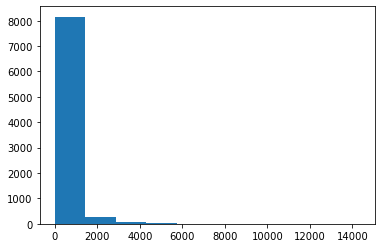

In [7]:
plt.hist(train_df['RoomService'])

# Feature Engineering

## Categorical Variables

In [8]:
df[['CabinDeck', 'CabinNumber', 'CabinSide']] = df['Cabin'].str.split('/', expand=True)

In [9]:
cd = pd.get_dummies(df['CabinDeck'], prefix = 'cd')
df = pd.concat([df, cd], axis=1)

In [10]:
df['CabinNumber'] = df['CabinNumber'].astype(float)%2
cn = pd.get_dummies(df['CabinNumber'], prefix = 'cn', drop_first=True)
df = pd.concat([df, cn], axis=1)

In [11]:
cs = pd.get_dummies(df['CabinSide'], prefix = 'cs', drop_first=True)
df = pd.concat([df, cs], axis=1)

In [12]:
hp = pd.get_dummies(df['HomePlanet'], prefix = 'hp')
df = pd.concat([df, hp], axis=1)

In [13]:
le = LabelEncoder()

In [14]:
df['CryoSleep']= le.fit_transform(df['CryoSleep'])

In [15]:
dest = pd.get_dummies(df['Destination'], prefix = 'dest')
df = pd.concat([df, dest], axis=1)

In [16]:
df['HomePlanet']= le.fit_transform(df['HomePlanet'])
df['CabinDeck']= le.fit_transform(df['CabinDeck'])
df['CabinSide']= le.fit_transform(df['CabinSide'])
df['CabinNumber']= le.fit_transform(df['CabinNumber'])
df['VIP']= le.fit_transform(df['VIP'])
df['Destination']= le.fit_transform(df['Destination'])

In [17]:
df['Transported']= le.fit_transform(df['Transported'])

# Nulls

In [18]:
train = df[df['PassengerId'].isin(train_df['PassengerId'])]
test = df[df['PassengerId'].isin(test_df['PassengerId'])]
train = train.copy()
test = test.copy()

In [19]:
mean_imputer = SimpleImputer(strategy='mean')
median_imputer = SimpleImputer(strategy='median')
constant_imputer = SimpleImputer(strategy='constant', fill_value=-99999)
frequent_imputer = SimpleImputer(strategy='most_frequent')

In [20]:
train[['HomePlanet', 'CryoSleep', 'CabinDeck', 'CabinNumber', 'CabinSide', 'Destination', 'VIP']] = frequent_imputer.fit_transform(train[['HomePlanet', 'CryoSleep', 'CabinDeck', 'CabinNumber', 'CabinSide', 'Destination', 'VIP']])
test[['HomePlanet', 'CryoSleep', 'CabinDeck', 'CabinNumber', 'CabinSide', 'Destination', 'VIP']] = frequent_imputer.fit_transform(test[['HomePlanet', 'CryoSleep', 'CabinDeck', 'CabinNumber', 'CabinSide', 'Destination', 'VIP']])

train[['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']] = median_imputer.fit_transform(train[['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']])
test[['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']] = median_imputer.fit_transform(test[['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']])

train[['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']] = mean_imputer.fit_transform(train[['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']])
test[['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']] = mean_imputer.fit_transform(test[['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']])


# Numerical Variables

In [21]:
ss = StandardScaler()

In [22]:
train[['std_RoomService', 'std_FoodCourt', 'std_ShoppingMall', 'std_Spa', 'std_VRDeck']] = ss.fit_transform(train[['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']])
test[['std_RoomService', 'std_FoodCourt', 'std_ShoppingMall', 'std_Spa', 'std_VRDeck']] = ss.transform(test[['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']])


In [23]:
log = PowerTransformer()

In [24]:
train[['log_RoomService', 'log_FoodCourt', 'log_ShoppingMall', 'log_Spa', 'log_VRDeck']] = log.fit_transform(train[['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']])
test[['log_RoomService', 'log_FoodCourt', 'log_ShoppingMall', 'log_Spa', 'log_VRDeck']] = log.transform(test[['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']])


In [25]:
train.corr()['Transported']


HomePlanet            0.107755
CryoSleep             0.404716
Destination          -0.104817
Age                  -0.074233
VIP                  -0.014260
RoomService          -0.241124
FoodCourt             0.045583
ShoppingMall          0.009391
Spa                  -0.218545
VRDeck               -0.204874
Transported           1.000000
CabinDeck            -0.109925
CabinNumber           0.014645
CabinSide             0.093319
cd_A                 -0.002623
cd_B                  0.144733
cd_C                  0.108193
cd_D                 -0.034046
cd_E                 -0.097965
cd_F                 -0.087753
cd_G                  0.016269
cd_T                 -0.014568
cn_1.0                0.016094
cs_S                  0.101455
hp_Earth             -0.169019
hp_Europa             0.176916
hp_Mars               0.019544
dest_55 Cancri e      0.108722
dest_PSO J318.5-22    0.000092
dest_TRAPPIST-1e     -0.094700
std_RoomService      -0.241124
std_FoodCourt         0.045583
std_Shop

## Feature Selection

In [26]:
train = train[['PassengerId', 'CryoSleep', 'Age', 'VIP', 'cd_B', 'cd_C', 'cd_E', 'cd_F', 'cs_S', 'hp_Earth', 'hp_Europa', 'dest_55 Cancri e', 'dest_TRAPPIST-1e', 'log_RoomService', 'log_FoodCourt', 'log_ShoppingMall', 'log_Spa', 'log_VRDeck', 'Transported']]
test = test[['PassengerId', 'CryoSleep', 'Age', 'VIP', 'cd_B', 'cd_C', 'cd_E', 'cd_F', 'cs_S', 'hp_Earth', 'hp_Europa', 'dest_55 Cancri e', 'dest_TRAPPIST-1e', 'log_RoomService', 'log_FoodCourt', 'log_ShoppingMall', 'log_Spa', 'log_VRDeck', 'Transported']]

In [27]:
y = train['Transported']
X = train.drop('Transported', axis=1)

# Applying ML Models

In [28]:
gbc = GradientBoostingClassifier()
lr = LogisticRegression()

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [30]:
gbc.fit(X_train, y_train)
lr.fit(X_train, y_train)

LogisticRegression()

In [31]:
y_pred_gbc = gbc.predict(X_test)
y_pred_lr = lr.predict(X_test)

In [32]:
cm_gbc = confusion_matrix(y_test, y_pred_gbc)
cm_lr = confusion_matrix(y_test, y_pred_lr)

In [33]:
print(cm_gbc)

[[637 224]
 [139 739]]


In [34]:
print(cm_lr)

[[531 330]
 [441 437]]


In [35]:
accuracy_score(y_test, y_pred_gbc)

0.7912593444508338

In [36]:
accuracy_score(y_test, y_pred_lr)

0.5566417481311098

# Preparing submission

In [49]:
y_submission = pd.DataFrame(gbc.predict(test.drop('Transported', axis=1)), columns=['Transported'])

In [50]:
y_submission['PassengerId'] = test['PassengerId']
y_submission = y_submission[['PassengerId', 'Transported']]

In [55]:
y_submission['Transported'].replace({0: 'False', 1: 'True'}, inplace=True)

In [56]:
y_submission.to_csv('output/spaceship_titanic.csv', index=False)